<h1> Titanic Survive Prediction

<h3>O Problema

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipo de pessoas têm maior probabilidade de sobreviver?" usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica etc.).

<h3>Quais dados vamos usar?

Neste problema, você terá acesso a dois conjuntos de dados semelhantes, que incluem informações sobre passageiros como nome, idade, sexo, classe socioeconômica etc. Um conjunto de dados é intitulado `train.csv` e o outro é intitulado` test.csv` .

O `train.csv` conterá os detalhes de um subconjunto dos passageiros a bordo (891 pessoas) e revelará se eles sobreviveram ou não.

O conjunto de dados `test.csv` contém informações semelhantes, mas não divulga a sobrevivência para cada passageiro. É nele que vamos prever esses resultados.

Usando os padrões encontrados nos dados `train.csv`, preveja se os outros 418 passageiros a bordo (encontrados em `test.csv`) sobreviveram. 

O conjunto de dados pode ser obtido no Kaggle através do link: https://www.kaggle.com/c/titanic/data

<h2>1º Passo - Entendedo o problema

<h4>Descrição do conjunto de teste:

* __PassengerId__: ID único de um passageiro 
* __Survival__: Sobrevivência, (1)sobreviveu e (0) não sobreviveu; 
* __Pclass__: Classe de bilhetes do passageiro (1st, 2nd, or 3rd); 
* __Name__: Nome; 
* __Sex__: Sexo; 
* __Age__: Idade (em anos);
* __SibSp__ : Número de irmãos / cônjuges a bordo do Titanic;
* __Parch__: Número de pais / filhos a bordo do Titanic;
* __Ticket__: Numero do bilhete;
* __Fare__: Tarifa de passageiros;
* __Cabin__: Cabine;
* __Embarked__: Porto de embarcação (C - Cherbourg, S - Southampton, Q = Queenstown).

<h2>2º Passo - Importar as Bibliotecas

In [2]:
# Álgebra Linear:
import numpy as np 

# Processamento/manipulação dos dados:
import pandas as pd
import random #seleção de valores aleatórios para plotagem

# Visualização dos dados:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algoritimos Machine Learning:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
# Lista de cores para serem usadas nos gráficos:
cores = [
         ['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
         ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
         ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
         ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
         ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
         ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
         ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
        ]

<h2>3º Passo - Importar as bases de dados

Como dito na introdução, para esse problemas temos dois conjutos de dados: `train.csv` e `test.csv`. Vamos importá-los. 

In [4]:
test_df = pd.read_csv("datasets/test.csv")
train_df = pd.read_csv("datasets/train.csv")

<h2>4º Passo - Análise dos dados

Antes de aplicar qualquer algorítimo de ML precisamos entender nossos conjunto de dados e analizar quais deles podem nos servir para chegramos onde queremos e gerar valor.

In [5]:
#Obtendo informações do DataSet:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observando a saída acimaconcluímos que:
* O conjunto de dados `train` tem 891 entradas de dados (linhas) e 11 características + a variável de destino `Survived` (colunas);
* Temos: 2 recursos do tipo floats (float64), 5 do tipo inteiros (int64) e 5 do tipo objetos (object).

Lembrando que o conjunto `train` é o que será utilizado para treinar o algoritimo de Machine Learning. Então é nele que vamos fazer as modificações.

In [6]:
# Calculando estatisticas descritivas para colunas numericas:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4>Observações que podemos obter com os dados acima:

* Temos valores faltantes na coluna `Age`;
* Nossa média de sobrevivente é de __38%__;
* O range de idades (`Age`) dos passageiros varia de 0,42 anos (min) à 80 anos (max). 

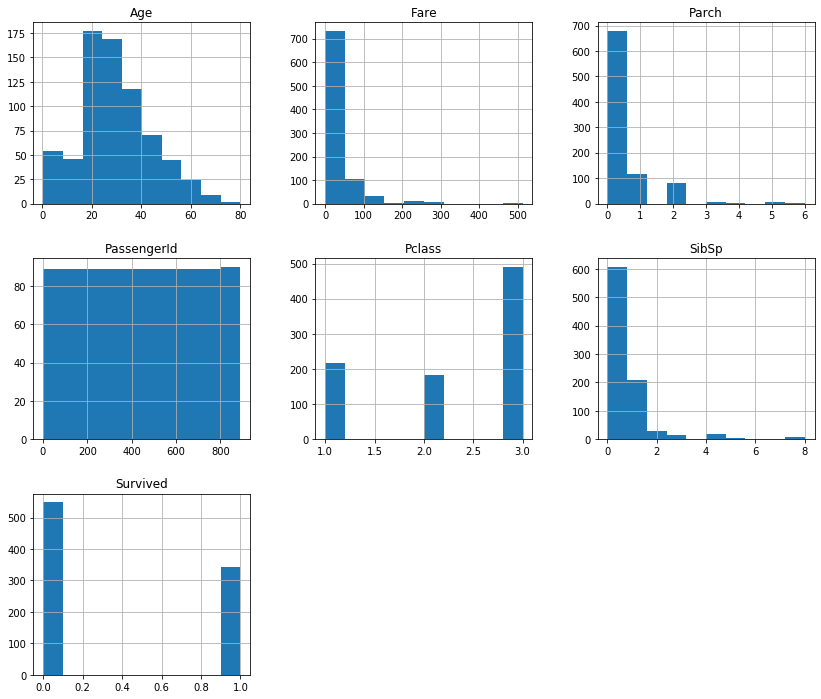

In [7]:
# Histograma das variáveis numéricas:
train_df.hist(figsize = (14,12));

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ao executar o comando `.head(10)` acima, obtemos as cinco primeiras linhas do nosso dataset, esse método nos permite fazer uma análise visual e simples. Podemos observar alguns pontos importantes:

* Dectamos também que outras colunas além de `Age` possuem valores ausentes (NaN = não um número). Esses valores ausentes precisam ser tratados;
* As colunas possuem valores em intervalos muito diferentes, para isso precisaremos converter-los na mesma escala.  

Outro ponto importante é que para utilizar algorítimos de Machine Learning precisaremos que as features sejam valores númericos, o que não acontece em todas as colunas do dataset, por isso iremos converter alguns recursos em numéricos. 

<h4>Primeiro vamos resolver os problemas dos valores faltantes:

In [9]:
# Identificando quais colunas possuem valores faltantes:
valores_faltantes = train_df.isnull().sum().sort_values(ascending=False)
valores_faltantes

percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_1.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [10]:
# Transformando os valores faltantes anteriores em porcentagem: 
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
percent_2.sort_values(ascending=False)

# Criando um dataframe com as porcentagens e o total dos valores faltantes:
missing_data = pd.concat([valores_faltantes, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Na tabela acima podemos entender fatos interessantes sobre nosso dataset:
* A coluna `Embarked` tem apenas __2__ valores ausentes, que podem ser facilmente preenchidos. 
* O recurso `Age` tem __177__ valores ausentes, o que será mais complicado de resolver e exigirá uma análise mais apurada;
* Na coluna `Cabin` notamos um total de __77,1%__ de dados fantantes, o que significa que precisam investiga-lo melhor para ver se iremos usá-lo como feature.

<h2>5º Passo - Tratamento de dados

Vamos remover `PassengerId` do dataset `train_df` e `Ticket` dos datasets `train_df` e `test_df`, porque essas colunas não contribuem para a probabilidade de sobrevivência de uma pessoa ao Titanic.

In [11]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [12]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [13]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Agora vamos lidar com os outros valores faltantes: 
* `Embarked` com __2__ valores faltantes;  
* `Age` com __177__ vaores fantantes;
* `Cabin` com __687__ valores faltantes.

<h3> Embarked:

A coluna `Embarked` tem apenas dois valores ausentes, podemos preenche-los com a __moda__ (valor mais comum).

In [14]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Aqui observamos que o valor mais comum __top__ é '__S__' com 644 ocorrências.

In [15]:
# Vamos preencher os valores faltantes com a moda:
valor_comum = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(valor_comum)

In [16]:
train_df.isnull().sum()   

# Criaremos um simples teste para verificar se a coluna 'Embarked' está sem valores ausentes:
if train_df['Embarked'].isnull().sum() == 0:
    print('Sem valores ausentes!')
else:
    print('Volte ao passo anterior')

Sem valores ausentes!


In [17]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


<h3> Age:

Agora podemos resolver o problema dos valores ausentes da coluna `Age`. 

Vamos criar uma matriz que com números aleatórios para inseri-los nas idades faltantes. Esses valores são calculados com base no __valor médio__ da idade em relação ao __desvio padrão__ e `is_null`.

In [18]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    # Computar números aleatórios entre a média, desvio padrão (std) e is_null:
    random_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Preencher valores NaN na coluna Age com valores aleatórios gerados:
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)

In [19]:
# Teste para verificar se a coluna esta sem valores ausentes:

train_df['Age'].isnull().sum()

if train_df['Age'].isnull().sum() == 0:
    print('Sem valores ausentes!')
else:
    print('Volte ao passo anterior')

Sem valores ausentes!


In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S


<h3> Cabine:

Agora vamos analisara coluna `Cabin`. Como é um número expressivo (77,1%) de dados faltantes, a primeira idéia que nos vem à cabeça é não usar essa coluna para o treinamento do nosso algorítimo e deletá-la. 

Porém, se analizar-mos bem os dados algumas informações úteis podem ser extraídas usando esse atributo. Cada número de cabine está no formato (__Letra__ + __Numero__). Então, se separarmos a __letra__ dos __numeros__, obtemos a "__letra__" que refere-se ao nível (deck) do navio e o "__numero__" que se refere ao numero da cabine. 




Portanto, vamos extraí-los e criar um novo recurso que contenha apenas o __deck__. 
Depois, converteremos o recurso em uma variável numérica e os valores ausentes converteremos em zero.

In [21]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

Após retirarmos a informação `Deck` da coluna `Cabin` podemos escluí-la:

In [22]:
# Excluindo a variavel cabine:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [23]:
# Teste para verificar se a coluna esta sem valores ausentes:

train_df['Deck'].isnull().sum()

if train_df['Deck'].isnull().sum() == 0:
    print('Sem valores ausentes!')
else:
    print('Volte ao passo anterior')

Sem valores ausentes!


Vamos olhar como estão ficando nossos dados:

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,8


<h2>6º Passo - Normalização dos dados:

O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Esse passo é importante pois os algoritimos de ML só trabalham com números.

In [25]:
# Obtendo informações do DataSet:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        418 non-null    object 
 9   Embarked     418 non-null    object 
 10  Deck         418 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 32.8+ KB


Primeiro vamos transformar os valores __float__ para __int__.

<h3> Fare:

In [26]:
# Transformando a coluna 'Fare' (tarifa) de float para int.
data = [train_df, test_df]
for row in data:
    row ['Fare'] = row['Fare'].fillna(0)
    row ['Fare'] = row['Fare'].astype(int)

In [27]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S,8


Agora vamos trasformar os valores __object__ para __int__:

<h3>Sex:

Convertendo a coluna `Sex` (__object__) em __int__.

In [28]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [29]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,S,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,S,8


<h3> Name:

In [30]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Extraindo os Pronomes de tratamento:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Substituindo os pronomes com o pronome mais comum ou como Rare:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Converter os ronomes em números:
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Nos campos NaN colocar 0:
    dataset['Title'] = dataset['Title'].fillna(0)

Agora vamos excluir a coluna `Name`.

In [31]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,S,8,1
1,1,1,1,38,1,0,71,C,3,3
2,1,3,1,26,0,0,7,S,8,2
3,1,1,1,35,1,0,53,S,3,3
4,0,3,0,35,0,0,8,S,8,1


<h3> Embarked:

In [33]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1


Pronto, todos os nossos dados agora são valores iteiros.

<h2> 7º Passo - Categorizando os dados:

Vamos categorizar os dados para que possamos trabalhar com valores na mesma escala, isso permite maior confiabilidade.

<h3> Age:

Primeiro vamos converter a coluna `Age` para um intervalo de idades. Criaremos uma nova variável chamda `AgeGroup`, categorizando cada idade em um grupo. Observe que é importante prestar atenção em como você forma esses grupos, pois você não deseja, por exemplo, que 80% dos seus dados caiam em um grupo só.

In [35]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [36]:
# Verificando a distribuição das idades:
train_df['Age'].value_counts()

6    162
4    160
5    148
3    144
2    113
1     96
0     68
Name: Age, dtype: int64

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1


<h3> Fare:

Agora precisamos fazer o mesmo com a coluna `Fare`, que fizemos com a `Age`. Mas __atenção__ se cortarmos o intervalo dos valores de tarifa em algumas categorias igualmente grandes, 80% dos valores cairiam em uma ctegoria só, o que não queremos lembra? Então vamos utilizar a função `qcut()`, que nos ajudará a formar as categorias.

In [38]:
pd.qcut(train_df['Fare'], q=5).value_counts()

(-0.001, 7.0]    241
(21.0, 39.0]     180
(39.0, 512.0]    176
(10.0, 21.0]     171
(7.0, 10.0]      123
Name: Fare, dtype: int64

In [39]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [40]:
# Verificando a distribuição das idades:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,0,0,8,1
1,1,1,1,5,1,0,3,1,3,3
2,1,3,1,3,0,0,0,0,8,2
3,1,1,1,5,1,0,3,0,3,3
4,0,3,0,5,0,0,1,0,8,1


<h2> 8º Passo - Criando novos parametros (interações):

<h3> Age Class:

In [42]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,8,1,6
1,1,1,1,5,1,0,3,1,3,3,5
2,1,3,1,3,0,0,0,0,8,2,9
3,1,1,1,5,1,0,3,0,3,3,5
4,0,3,0,5,0,0,1,0,8,1,15


<h3> Fare per Person:

In [44]:
data = [train_df, test_df]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Not_Alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Not_Alone'] = 1
    dataset['Not_Alone'] = dataset['Not_Alone'].astype(int)

for df in data:
    df['Fare_per_Person'] = df['Fare']/(df['Relatives']+1)
    df['Fare_per_Person'] = df['Fare_per_Person'].astype(int)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,Relatives,Not_Alone,Fare_per_Person
0,0,3,0,2,1,0,0,0,8,1,6,1,0,0
1,1,1,1,5,1,0,3,1,3,3,5,1,0,1
2,1,3,1,3,0,0,0,0,8,2,9,0,1,0
3,1,1,1,5,1,0,3,0,3,3,5,1,0,1
4,0,3,0,5,0,0,1,0,8,1,15,0,1,1


<h2> 9º Passo - Selecionando as Features para o modelo:

O método que escolhi para escolher as features que serão importantes para meu augorítimo de ML é o da __matriz de correlação__, utilizando a __correlação de Pearson__:

<h4> Correlação de Pearson

O coeficiente de __correlação de Pearson (r)__ ou __coeficiente de correlação produto-momento__ ou o __r de Pearson__ mede o grau da correlação linear entre duas variáveis __quantitativas__. É um índice adimensional com valores situados ente `-1,0` e `1.0` inclusive, que reflete a intensidade de uma relação linear entre dois conjuntos de dados. 

Este coeficiente assume apenas valores entre __-1__ e __1__ onde:
* `r = 1` Significa uma correlação perfeita positiva entre as duas variáveis.
* `r = -1` Significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui.
* `r = 0` Significa que as duas variáveis não dependem linearmente uma da outra.

No entanto, pode existir uma outra dependência que seja "não linear". Assim, quando o resultado for __r = 0__ ele deve ser investigado por outros métodos. 


In [46]:
# Matriz de correlação para entendermos quais features mais influenciam a sobrevivência:

train_df.corr(method = 'pearson')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,Relatives,Not_Alone,Fare_per_Person
Survived,1.000000,-0.338481,0.543351,-0.038552,-0.035322,0.081629,0.312249,0.106811,-0.289569,0.407753,-0.249430,0.016639,-0.203367,0.188668
Pclass,-0.338481,1.000000,-0.131900,-0.295287,0.083081,0.018443,-0.681035,0.045702,0.745453,-0.173929,0.402983,0.065997,0.135207,-0.641545
Sex,0.543351,-0.131900,1.000000,-0.058606,0.114631,0.245489,0.245782,0.116569,-0.114358,0.502713,-0.129368,0.200988,-0.303646,0.020643
Age,-0.038552,-0.295287,-0.058606,1.000000,-0.218874,-0.168736,0.077648,-0.008968,-0.197757,-0.088365,0.704218,-0.233891,0.164582,0.268502
SibSp,-0.035322,0.083081,0.114631,-0.218874,1.000000,0.414838,0.342377,-0.059961,0.043134,0.269623,-0.180399,0.890712,-0.584471,-0.241858
Parch,0.081629,0.018443,0.245489,-0.168736,0.414838,1.000000,0.369094,-0.078665,-0.029064,0.315784,-0.121898,0.783111,-0.583398,-0.268087
Fare,0.312249,-0.681035,0.245782,0.077648,0.342377,0.369094,1.000000,-0.055693,-0.563527,0.313595,-0.393289,0.418396,-0.526320,0.591019
Embarked,0.106811,0.045702,0.116569,-0.008968,-0.059961,-0.078665,-0.055693,1.000000,-0.036131,0.045400,0.008797,-0.080281,0.017807,-0.040828
Deck,-0.289569,0.745453,-0.114358,-0.197757,0.043134,-0.029064,-0.563527,-0.036131,1.000000,-0.128043,0.327699,0.014961,0.133152,-0.476615
Title,0.407753,-0.173929,0.502713,-0.088365,0.269623,0.315784,0.313595,0.045400,-0.128043,1.000000,-0.220832,0.342039,-0.405813,-0.018381


Aqui vamos analisar quais valores estão mais proximos de `1` ou `-1` na linha `Survived`, isso vai nos mostrar quais features poderemos utilizar para treinar o modelo.

<h3>Outro método de escolher as features importantes para seu modelo é o gráfico:

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0, 0.5, '')

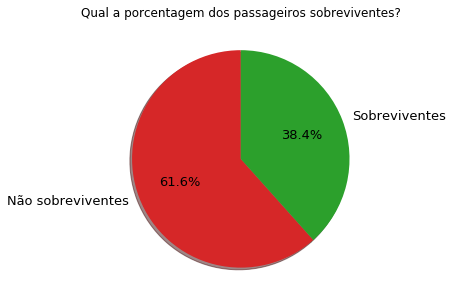

In [47]:
# Criar um mapa indicando os Sobreviventes e Não Sobreviventes:
train_df['Not_Survived'] = train_df['Survived'].map({0:1,1:0})

# Contar os valores encontrados de sobreviventes e não sobreviventes e exibe na tela:
print('Sobreviventes     :', train_df['Survived'].value_counts()[1])
print('Não Sobreviventes :', train_df['Survived'].value_counts()[0])

# Gerar o gráfico:
train_df['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:green'),title='Qual a porcentagem dos passageiros sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

Vamos ver alguns relacionando a coluna `Survived` com nossas outras colunas.

In [48]:
train_df = train_df.drop(['Not_Survived'], axis=1)

<h4>Survived X Pclass:

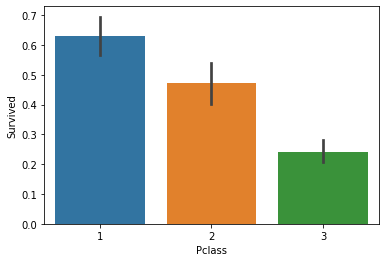

In [49]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [50]:
# Quantidade de passageiros por classe:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

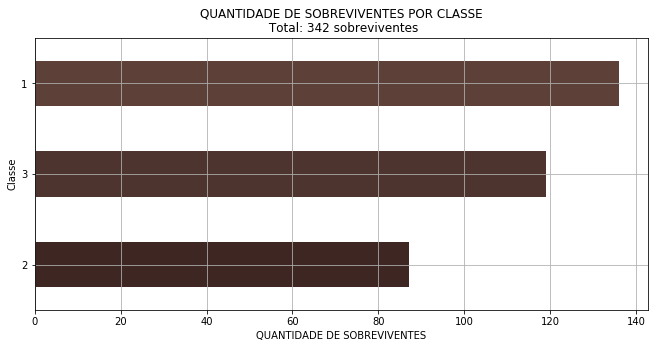

In [51]:
# Filtrando o dataset para conter dados apenas de pessoas que sobreviveram:
classe_sobrevivente = train_df[train_df['Survived'] == 1]['Pclass'].value_counts().sort_values(ascending=True)
classe_sobrevivente.plot(kind='barh', figsize=(11,5), color = random.choice(cores), rot=0, grid=True)

plt.title('QUANTIDADE DE SOBREVIVENTES POR CLASSE\n Total: %s sobreviventes' % (classe_sobrevivente.sum()))
plt.xlabel('QUANTIDADE DE SOBREVIVENTES')
plt.ylabel('Classe')
plt.show()

<Figure size 360x360 with 0 Axes>

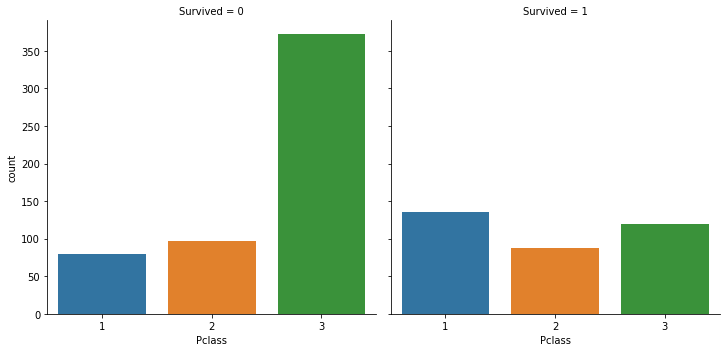

In [52]:
#  Pclass representa o estatus socio-esconômico (SES): 
# 1st = Upper, 2nd = Middle, 3rd = Lower

plt.figure(figsize = (5,5))

# Nós vamos usar o catplot. Ele nos permite agrupar dentro de variáveis categóricas adicionais.
sns.catplot(x = 'Pclass', data = train_df, col="Survived", kind = 'count')
plt.show()

Com base nos graficos acima podemos observar duas coisas:
* Quanto maior a classe social maior a porcentagem de sobreviventes (fato esperado, visto que suas cabines situavam-se na parte superior do navio, local este próximo aos botes salva-vidas);
* Apesar da classe 3 ter mais sobreviventes que a 2ª, em termos de porcentagem ela tem bem menos cerca de 25% apenas já a 2ª classe teve em torno de 52% de sobreviventes.

<h4> Survived x Age:

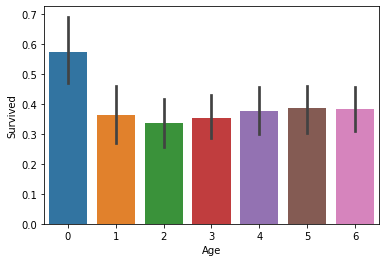

In [53]:
sns.barplot(x='Age', y='Survived', data = train_df)

Aqui notamos que a distribuição dos sobreviventes pelas faixas etárias.

<h4> Survived x Enbarked:

<Figure size 360x360 with 0 Axes>

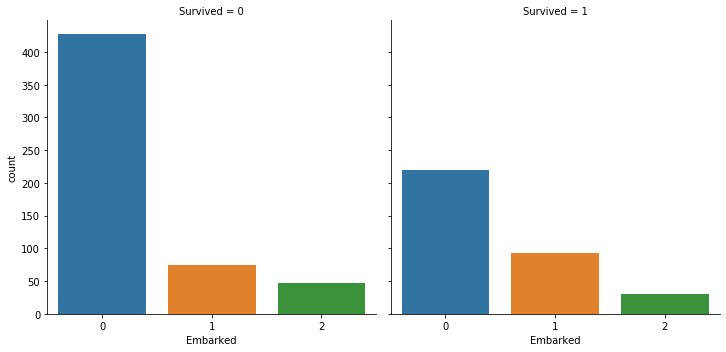

In [54]:
# lets visualize the Embarked column. 
plt.figure(figsize = (5,5))

sns.catplot(x = 'Embarked', data = train_df, col="Survived", kind = 'count')
plt.show()

<h4> Survived x Sex:

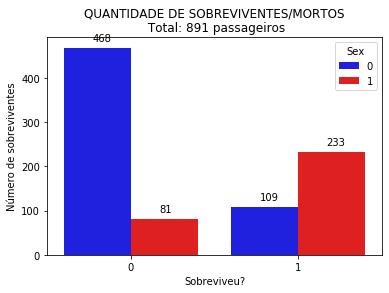

In [55]:
# Quantidades de sobreviventes e mortos na tragédia:
passageiros = sns.countplot(data = train_df, x ='Survived', hue = 'Sex', palette = ['Blue', 'Red'])

# Posicionando valores acima das barras:
for p in passageiros.patches:
    b = p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE SOBREVIVENTES/MORTOS\n Total: %s passageiros' % (train_df.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

Aqui notamos que as mulheres(__1__) sobreviveram mais que homens(__0__). Sendo esse também um bom concorrente à feature para nosso algoritimo de ML.

<h2> 10º Passo - Criação dos Modelos de Machine Learning:

Primeiro vamos deletar do nosso conjunto de treino `train_df`. 

In [56]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop('PassengerId', axis=1).copy()

A explicação dos algorítimos utilizados abaixo assim como de muitos outro pode ser encontrada nesse link: https://medium.com/@cristianofurquim/10-algoritmos-de-aprendizagem-de-m%C3%A1quinas-machine-learning-que-voc%C3%AA-precisa-saber-c49f9eefe319

In [57]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,Relatives,Not_Alone,Fare_per_Person
0,3,0,2,0,0,0,2,8,1,6,0,1,0
1,3,1,5,1,0,0,0,8,3,15,1,0,0
2,2,0,3,0,0,1,2,8,1,6,0,1,1
3,3,0,5,0,0,1,0,8,1,15,0,1,1
4,3,1,5,1,1,1,0,8,3,15,2,0,0


In [58]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,Relatives,Not_Alone,Fare_per_Person
0,3,0,2,1,0,0,0,8,1,6,1,0,0
1,1,1,5,1,0,3,1,3,3,5,1,0,1
2,3,1,3,0,0,0,0,8,2,9,0,1,0
3,1,1,5,1,0,3,0,3,3,5,1,0,1
4,3,0,5,0,0,1,0,8,1,15,0,1,1


<h3> Stochastic gradient descent (SGD) learning

O método da descida de gradiente, é utilizado para encontrar o mínimo de uma função de erro (ou função de perda, em inglês loss function). Um algoritmo de aprendizagem de máquina, normalmente se inicia em um ponto e a partir desse ponto é calculado o seu gradiente, de modo que seja possível minimizar o erro de nossa loss function.
A função é basicamente calculada pela derivada da função em determinado ponto, essa derivada aponta para onde a função está crescendo.

In [59]:
# Stochastic Gradient Descent (SGD):

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

79.8 %


<h3>Random Forest

Floresta Aleatória (random forest) é um algoritmo de aprendizagem supervisionada. Ele cria uma floresta de um modo aleatório. A “floresta” que ele cria é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumenta o resultado geral.

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.7 %


<h3> Logistic Regression

Podemos entender regressão logística como o análogo de regressão linear para problemas de classificação. Esse tipo de problema surge quando queremos categorizar alguma variável por classes. Quando isso acontece, a variável __y__ que queremos prever é discreta.

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.48 %


<h3> KNN - K Neighbors 

Este é um algoritmo simples que prevê pontos de dados desconhecidos com os seus vizinhos mais próximos. O valor de k é um fator crítico aqui quanto à precisão da predição. Ele determina o mais próximo ao calcular a distância usando funções básicas de distância como Euclidean.

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

87.09 %


<h3>Gaussian Naive Bayes

Este algoritmo baseia-se no “Teorema de Bayes” em probabilidade. Devido a isso, Naive Bayes só pode ser aplicado se os recursos forem independentes um do outro, pois é um requisito no teorema de Bayes. Se tentarmos prever um tipo de flor por seu comprimento e largura de pétala, podemos usar a abordagem Naive Bayes uma vez que ambos os recursos são independentes.

In [63]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.67 %


<h3>Perceptron

O Perceptron é um classificador linear, ou seja, os problemas solucionados por ele devem ser linearmente separáveis. O gráfico a seguir mostra um conjunto de pontos bi-dimensional que pode ser separado linearmente

In [64]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

80.92 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<h3> Linear SVC

Ele pertence ao algoritmo do tipo de classificação. O algoritmo irá separar os pontos de dados usando uma linha. Esta linha é escolhida de tal forma que será mais importante dos pontos de dados mais próximos em 2 categorias. 

In [65]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

81.59 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<h3>Decision Tree

Este algoritmo classifica a população para vários conjuntos com base em algumas propriedades escolhidas (variáveis independentes) de uma população. Geralmente, esse algoritmo é usado para resolver problemas de classificação. A categorização é feita usando algumas técnicas como Gini, Qui-quadrado, entropia etc.

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.7 %


<h2>11º Passo - Avaliar o melhor modelo

Como testamos muitos modelos de ML, vamos ver o que se saiu melhor em prever o que desejamos. 

In [67]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')

result_df


,Score
Model,
Random Forest,92.70
Decision Tree,92.70
KNN,87.09
Support Vector Machines,81.59
Logistic Regression,81.48
Perceptron,80.92
Stochastic Gradient Decent,79.80
Naive Bayes,77.67


No caso os melhores modelos são 'Random Forest' e 'Decision Tree'.

<h2>12º Passo - K-Fold Cross Validation

<h3> K-Fold Cross Validation:

A K-Fold Cross Validation divide os dados aleatoriamente em __k__ subconjuntos chamados dobras. O que significa que nosso modelo será treinado e avaliado __k__ vezes. Cada vez que é avaliado em uma dobra e treinado nas outras __k-1__ dobras. O resultado dessa validação cruzada do K-Fold seria uma matriz que contém K pontuações diferentes. 

Em seguida, calculamos a __média__ e o __desvio padrão__ para essas pontuações. 


In [68]:
from sklearn.model_selection import cross_val_score
aux = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(aux, X_train, Y_train, cv=10, scoring = "accuracy")
print("Score:", scores)
print("Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Score: [0.8        0.83146067 0.73033708 0.83146067 0.87640449 0.84269663
 0.80898876 0.78651685 0.87640449 0.82022472]
Média: 0.8204494382022471
Desvio Padrão: 0.04101292900922732


Os valores acima mostram que nosso modelo tem uma precisão `média` de __82,2%__ e o `desvio padrão` de __4,8%__. Isso significa que a precisão do nosso modelo pode diferir +- __4,8%__.

<h2> 13º Passo - Verificando a importância das features no modelo de predição

O algorítimo Random Forest possui um recurso que facilita a medição da importância relativa de cada feature. 

O Sklearn mede a importância de uma feature observando quanto nós da arvore, usam esse recurso, reduzem a impureza em média (em todas as vezes que utilizamos o algoritimo Random Forest).

Ele calcula essa pontuação automaticamente para cada feature após o treinamento e dimensiona os resultados para que a soma de todas os parametros seja igual a 1. 

In [69]:
features = pd.DataFrame({'feature':X_train.columns,'Parâmetros':np.round(random_forest.feature_importances_,3)})
features = features.sort_values('Parâmetros',ascending=False).set_index('feature')
features  

,Parâmetros
feature,
Title,0.201
Sex,0.178
Age_Class,0.094
Deck,0.084
Pclass,0.074
Age,0.074
Fare,0.064
Relatives,0.064
Embarked,0.053


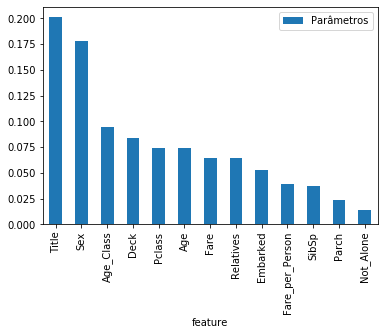

In [70]:
features.plot.bar()

Podemos observar através do gráfico que as features `Not_Alone` e `Parch` não possuem grande influência no nosso modelo de predição __Randon Forest__.

Logo podemos excluí-los para otimizar nosso algorítimo.

In [71]:
# Excluindo a coluna 'not_alone':
train_df  = train_df.drop("Not_Alone", axis=1)
test_df  = test_df.drop("Not_Alone", axis=1)

# Excluindo a coluna'Parch':
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

<h2>14º Passo - Retreinando o Modelo

Vamos treinar o modelo sem as features `Not_Alone` e `Parch` 

<h3> Decision Tree

In [72]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.7 %


<h3> Random Forest

In [76]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


92.7 %


<h2>15º Passo - Out-of-bag (OOB)

O OOB ou Estimativa out-of-bag, é um método de medir o erro de previsão de __Random Forests__, __Decision Tree__ e outros modelos de aprendizado de máquina utilizando agregação de bootstrap (ensacamento) na subamostra amostras de dados usadas para treinamento. 

OOB é o erro de previsão médio em cada amostra de treinamento xᵢ, usando apenas as árvores que não tiveram xᵢ em sua amostra de autoinicialização.

A subamostragem permite definir uma estimativa imediata da melhoria do desempenho da previsão, avaliando as previsões sobre as observações que não foram usadas na construção do próximo aluno base.

In [77]:
print("oob_score:", round(random_forest.oob_score_, 4)*100, "%")

oob_score: 81.37 %


<h2> 16º Passo - Ajuste dos Hiperparâmetros

Os hiperparâmetros são variáveis que controlam o próprio processo de treinamento. Por exemplo, faz parte da configuração de uma rede neural profunda decidir quantas camadas ocultas de nós precisam ser usadas entre a camada de entrada e a camada de saída, bem como quantos nós cada camada precisa usar. Essas variáveis não estão diretamente relacionadas aos dados de treinamento. Elas são variáveis de configuração. Os parâmetros mudam durante um job de treinamento, enquanto os hiperparâmetros geralmente permanecem constantes durante um job.

Fonte: https://cloud.google.com/ml-engine/docs/hyperparameter-tuning-overview?hl=pt-br

<h4>Grid search

Essa técnica irá testar todas as combinações possíveis dos hiperparâmetros, exaustivamente. Basicamente, irá fornecer alguns valores de input e testar todas as combinações plotando em um plano cartesiano (por isso o nome de grid). Em seguida, selecionará os hiperparâmetros que obtiveram o menor erro.

In [78]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

KeyboardInterrupt: 

In [79]:
clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [80]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 12,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.39 %


<h2> 16º Passo - Avaliação adicional do modelo

Fonte: https://www.kaggle.com/samukaunt/titanic-passo-a-passo-com-8-modelos-ml-pt-br

<h3> Matriz de Confusão:

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[491,  58],
       [ 96, 246]], dtype=int64)

A primeira linha é sobre as predições dos não sobreviventes: 488 passageiros foram classificados corretamente como não sobreviventes, chamados de verdadeiros negativos (VN) e 61 foram erroneamente classificados como não sobreviventes, os falsos negativos (FN).

A segunda linha é sobre as previsões dos sobreviventes: 94 passageiros classificados erroneamente como sobreviventes, falsos positivos (FP) e 248 onde corretamente classificados como sobreviventes, positivos verdadeiros (PV).

array([VN, FN],
      [FP, VP]], dtype=int64)

Uma matriz de confusão fornece muitas informações sobre o desempenho do nosso modelo, mas há uma maneira de obter ainda mais informações, por exemplo como calcular a precisão dos classificadores.

<h3> Precisão e Recuperação:

In [83]:
from sklearn.metrics import precision_score, recall_score

print("Precisão:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precisão: 0.8092105263157895
Recall: 0.7192982456140351


<h3> F-Score:

Você pode combinar precisão e recuperação em uma pontuação, chamada de F-Score. O F-Score é calculado com a média harmônica de precisão e recuperação. Observe que ele atribui muito mais peso a valores baixos. Com o resultado disso, o classificador só obterá um valor F alto, se tanto a recuperação quanto a precisão forem altas.

In [84]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7616099071207432

Nosso resultado foi um F-Score de 76%. A pontuação não é tão alta, porque o resultado da nossa recuperação foi de 72,5%.

Mas infelizmente o F-score não é perfeito, porque favorece os classificadores que têm uma precisão e uma recuperação semelhantes. Isso é um problema, porque às vezes você quer uma alta precisão e, às vezes, uma alta recuperação. A coisa é que uma precisão crescente, às vezes, resulta em um recuperação decrescente e vice-versa (dependendo do limite). Isso é chamado de troca de precisão / recuperação. Vamos ver isso abaixo.

<h3>Precision Recall Curve:

Para cada pessoa que nosso algoritmo Random Forest precisa classificar, ele calcula uma probabilidade baseada em uma função e classifica a pessoa como sobrevivente (quando a pontuação é maior do que o limite) ou como não sobrevivente (quando a pontuação é menor que o limite). É por isso que o limitar desempenha um papel importante.

Vamos plotar a precisão e recuperar com o limite usando o matplotlib:

In [85]:
from sklearn.metrics import precision_recall_curve

# Obtendo as probabilidades de nossas previsões
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

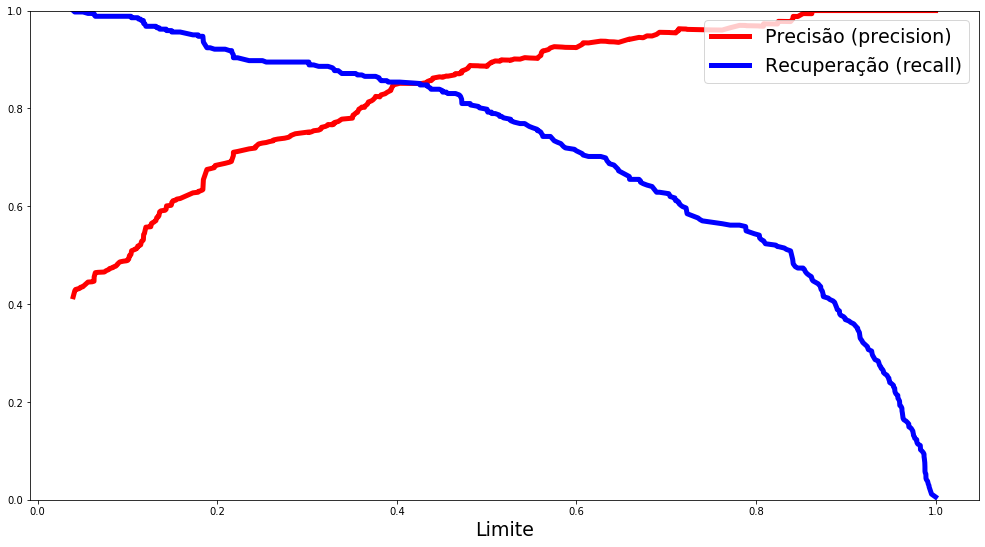

In [86]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão (precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recuperação (recall)", linewidth=5)
    plt.xlabel("Limite", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Acima podemos ver claramente que o Recuperação(Recall) está caindo rapidamente com uma precisão de cerca de 85%. Por causa disso, você pode querer selecionar a troca de precisão / recuperação antes disso - talvez em torno de 75%.

Agora você pode escolher um limite, que oferece a melhor compensação de precisão / recuperação para seu problema atual de aprendizado de máquina. Se você quiser, por exemplo, uma precisão de 80%, você pode facilmente olhar para os gráficos e ver que você precisaria de um limite de cerca de 0,4. Então você poderia treinar um modelo com exatamente esse limite e obteria a precisão desejada.

Outra maneira é traçar a precisão e recordar uns contra os outros:

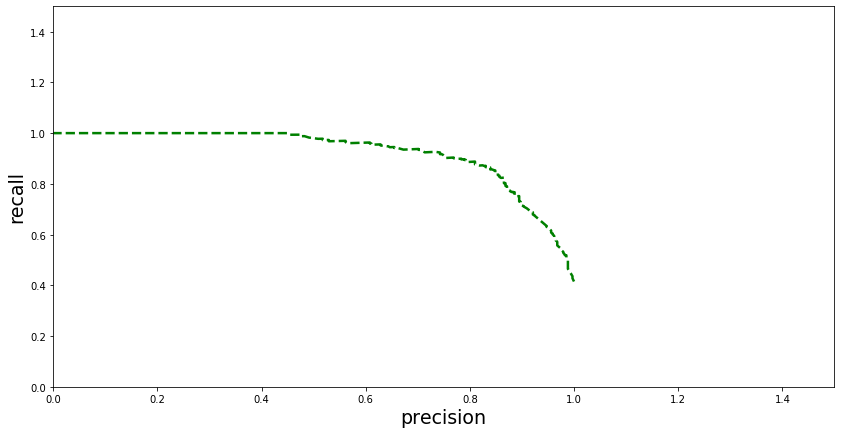

In [87]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

<h3> Curva ROC AUC:

Outra maneira de avaliar e comparar nosso modelo de classificação é utilizar Curva ROC AUC. Esta curva representa a taxa positiva real (também chamada de recall) contra a taxa de falsos positivos (proporção de instâncias negativas incorretamente classificadas), em vez de traçar a precisão versus a recuperação.

In [88]:
from sklearn.metrics import roc_curve
# calcular taxa positiva verdadeira e taxa de falsos positivos
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

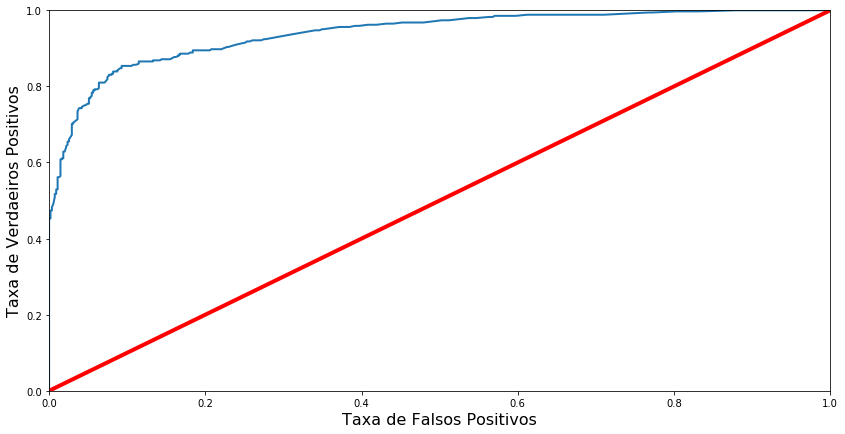

In [89]:
# plotando  a Curva ROC AUC
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

A linha vermelha no meio representa um classificador puramente aleatório (por exemplo, um coin flip) e, portanto, seu classificador deve estar o mais longe possível. Nosso modelo Random Forest parece ter feito um bom trabalho.

É claro que também temos uma desvantagem aqui, porque o classificador produz mais falsos positivos, quanto maior a taxa positiva verdadeira.


<h3>ROC AUC Score:


A ROC AUC Score é a pontuação correspondente à Curva ROC AUC. É calculado simplesmente medindo a área sob a curva, que é chamada de AUC.

Um classificador 100% correto teria uma pontuação AUC ROC de 1 e um classificador completamente aleatório teria uma pontuação de 0,5.

In [90]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9391930037601595


Excelente! Temos 93% 

<h2> 17º Passo - Submissão

In [91]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)